In [2]:
!pip install jieba

In [4]:
!pip install wordcloud

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://news.google.com/topstories?hl=zh-TW&gl=TW&ceid=TW:zh-Hant"

res = requests.get(url)

soup = BeautifulSoup(res.text, "html.parser")

titles = soup.select(".ipQwMb.ekueJc.RD0gLb")

links = soup.select(".VDXfz")

news_title=[]
news_links=[]

for each_title in titles:
    news_title.append(each_title.text)

for each_link in links:
    news_links.append("https://news.google.com" + each_link["href"].strip("."))
    
df = pd.DataFrame(
{
    "新聞標題":news_title,
    "內容連結":news_links
})


In [37]:
df

,新聞標題,內容連結
0,華航疫情疑又擴大 陳時中臨時召開緊急會議缺席立院,https://news.google.com/articles/CBMiNmh0dHBzO...
1,華航諾富特疑再傳疫情？陳時中上午臨時向立院告假,https://news.google.com/articles/CBMiKWh0dHBzO...
2,陳時中突向立院請假 為新增確診與交通部華航開會,https://news.google.com/articles/CBMiN2h0dHBzO...
3,華航再增確診 陳時中召開緊急會議 取消到立院備詢,https://news.google.com/articles/CAIiEDSLF_X2u...
4,陳時中開「緊急防疫會議」缺席立院答詢 陳玉珍：有點擔心,https://news.google.com/articles/CBMiLGh0dHBzO...
5,快訊／國防部曝去年2月開始吃美豬 合約到2022年,https://news.google.com/articles/CAIiEMNxj9w1L...
6,【中天直播# LIVE】國軍吃萊豬？！ 國防部長邱國正立院備詢@中天新聞20210510,https://news.google.com/articles/CCAiC2JkSkRUQ...
7,考量聯合作戰 國軍既有軍團、防衛指揮部擬改稱作戰區,https://news.google.com/articles/CBMiOmh0dHBzO...
8,【國軍吃美豬】部長說優先用國產品白講了！ 國防部報告曝光：去年2月就用進口加工肉｜ 蘋果新聞...,https://news.google.com/articles/CBMiR2h0dHBzO...
9,國軍副食美豬洗產地疑雲 國防部籲各部隊吃台豬免爭議,https://news.google.com/articles/CBMiKGh0dHBzO...


In [79]:
cleaned = []

for article_url in news_links:
    res2 = requests.get(article_url)
    soup2 = BeautifulSoup(res2.text, "html.parser")
    temp_content = soup2.find_all("p")
    for data in temp_content:
        cleaned.append(data.text)

In [80]:
cleaned

['為達最佳瀏覽效果，建議使用 Chrome、Firefox 或 Microsoft Edge 的瀏覽器。',
 '',
 '爆',
 '指揮中心指揮官陳時中臨時請假立法院。 （資料照）',
 '',
 '〔記者林惠琴／台北報導〕立法院社福及衛環委員會今日邀請衛福部等相關單位針對「我國國產疫苗研發進度、擴大開放民眾自費採檢申請資格與豁免疫苗專利保護對我國研發及生產疫苗之影響」進行專題報告，原定由衛福部長陳時中出席，但卻臨時改成由政務次長薛瑞元代打，薛瑞元表示，因為今天華航有新增個案，陳時中正在主持臨時召開的重要會議，與交通部、華航等相關單位開會，詳細狀況將於下午指揮中心記者會中宣布。',
 '華航案含諾富特飯店群聚感染，目前一共有累計31人確診，包含12名機師、9名機師家人、1名空服員、5名飯店員工、3名飯店員工家人、1名飯店外包商水電工。',
 '請繼續往下閱讀...',
 '',
 '「武漢肺炎專區」請點此，更多相關訊息，帶您第一手掌握。',
 '\n    不用抽 不用搶 現在用APP看新聞 保證天天中獎\u3000\n    點我下載APP\u3000\n    按我看活動辦法\n',
 '質疑疫情訊息大小眼 鄭麗文轟陳時中大頭症',
 '65歲以上5/10開放打疫苗 陳時中笑：我跟張教授都有保護力了',
 '陳玉珍批疫苗打不完硬推國軍接種 陳時中：並未強迫',
 '雙北市長批防疫 蘇揆：政府訂SOP卻不配合 陳時中再神仙也沒用',
 '苗栗9:06發生規模3.2地震 苗栗市最大震度4級',
 '金髮藍眼屏東媳婦的巧手與熱情  將老舊校園繪成美麗藝術品',
 '\n                    給土地婆織毛衣？土地公廟供桌上擺放毛線、棒針 惹民眾大好奇                                    ',
 '\n                    拿中市數位市民虛擬卡 手機就是借閱證                                    ',
 '\n                    幼時受扶助 證券公司總經理回饋捐助學弟妹獎助金                                    ',
 '\n                    帶腦麻兒參與百場路跑 陳其邁訪「超跑媽媽」祝母

In [81]:
articleALL = "\n".join(cleaned)

In [82]:
articleALL 

"為達最佳瀏覽效果，建議使用 Chrome、Firefox 或 Microsoft Edge 的瀏覽器。\n\n爆\n指揮中心指揮官陳時中臨時請假立法院。 （資料照）\n\n〔記者林惠琴／台北報導〕立法院社福及衛環委員會今日邀請衛福部等相關單位針對「我國國產疫苗研發進度、擴大開放民眾自費採檢申請資格與豁免疫苗專利保護對我國研發及生產疫苗之影響」進行專題報告，原定由衛福部長陳時中出席，但卻臨時改成由政務次長薛瑞元代打，薛瑞元表示，因為今天華航有新增個案，陳時中正在主持臨時召開的重要會議，與交通部、華航等相關單位開會，詳細狀況將於下午指揮中心記者會中宣布。\n華航案含諾富特飯店群聚感染，目前一共有累計31人確診，包含12名機師、9名機師家人、1名空服員、5名飯店員工、3名飯店員工家人、1名飯店外包商水電工。\n請繼續往下閱讀...\n\n「武漢肺炎專區」請點此，更多相關訊息，帶您第一手掌握。\n\n    不用抽 不用搶 現在用APP看新聞 保證天天中獎\u3000\n    點我下載APP\u3000\n    按我看活動辦法\n\n質疑疫情訊息大小眼 鄭麗文轟陳時中大頭症\n65歲以上5/10開放打疫苗 陳時中笑：我跟張教授都有保護力了\n陳玉珍批疫苗打不完硬推國軍接種 陳時中：並未強迫\n雙北市長批防疫 蘇揆：政府訂SOP卻不配合 陳時中再神仙也沒用\n苗栗9:06發生規模3.2地震 苗栗市最大震度4級\n金髮藍眼屏東媳婦的巧手與熱情  將老舊校園繪成美麗藝術品\n\n                    給土地婆織毛衣？土地公廟供桌上擺放毛線、棒針 惹民眾大好奇                                    \n\n                    拿中市數位市民虛擬卡 手機就是借閱證                                    \n\n                    幼時受扶助 證券公司總經理回饋捐助學弟妹獎助金                                    \n\n                    帶腦麻兒參與百場路跑 陳其邁訪「超跑媽媽」祝母親節快樂                                    \n 2021年5月10日‧星期一‧辛丑年

In [83]:
articleALL.replace("為達最佳瀏覽效果，建議使用 Chrome、Firefox 或 Microsoft Edge 的瀏覽器。","").replace("\n\n爆\n","").replace("\n\n","")

"指揮中心指揮官陳時中臨時請假立法院。 （資料照）〔記者林惠琴／台北報導〕立法院社福及衛環委員會今日邀請衛福部等相關單位針對「我國國產疫苗研發進度、擴大開放民眾自費採檢申請資格與豁免疫苗專利保護對我國研發及生產疫苗之影響」進行專題報告，原定由衛福部長陳時中出席，但卻臨時改成由政務次長薛瑞元代打，薛瑞元表示，因為今天華航有新增個案，陳時中正在主持臨時召開的重要會議，與交通部、華航等相關單位開會，詳細狀況將於下午指揮中心記者會中宣布。\n華航案含諾富特飯店群聚感染，目前一共有累計31人確診，包含12名機師、9名機師家人、1名空服員、5名飯店員工、3名飯店員工家人、1名飯店外包商水電工。\n請繼續往下閱讀...「武漢肺炎專區」請點此，更多相關訊息，帶您第一手掌握。    不用抽 不用搶 現在用APP看新聞 保證天天中獎\u3000\n    點我下載APP\u3000\n    按我看活動辦法質疑疫情訊息大小眼 鄭麗文轟陳時中大頭症\n65歲以上5/10開放打疫苗 陳時中笑：我跟張教授都有保護力了\n陳玉珍批疫苗打不完硬推國軍接種 陳時中：並未強迫\n雙北市長批防疫 蘇揆：政府訂SOP卻不配合 陳時中再神仙也沒用\n苗栗9:06發生規模3.2地震 苗栗市最大震度4級\n金髮藍眼屏東媳婦的巧手與熱情  將老舊校園繪成美麗藝術品                    給土地婆織毛衣？土地公廟供桌上擺放毛線、棒針 惹民眾大好奇                                                        拿中市數位市民虛擬卡 手機就是借閱證                                                        幼時受扶助 證券公司總經理回饋捐助學弟妹獎助金                                                        帶腦麻兒參與百場路跑 陳其邁訪「超跑媽媽」祝母親節快樂                                    \n 2021年5月10日‧星期一‧辛丑年四月初一日\n自由時報版權所有不得轉載© 2021 The Liberty Times. All Rights Reserved.\n熱門推播\n中央流行疫情指揮中心指揮官、衛生福

In [84]:
import jieba
jieba.load_userdict("dict.txt.big")

In [85]:
Sentence = jieba.cut(articleALL, cut_all=True)
print("全模式"+": " +"/ ".join(Sentence) + "\n")

全模式: 為/ 達/ 最佳/ 瀏覽/ 效果/ ，/ 建議/ 使用/ /  / / Chrome/ 、/ Firefox/ /  / / 或/ /  / / Microsoft/ /  / / Edge/ /  / / 的/ 瀏覽/ 瀏覽器/ 。/ 
/ / 
/ / 爆/ / 
/ / 指揮/ 指揮中心/ 中心/ 指揮/ 指揮官/ 陳/ 時/ 中/ 臨時/ 請假/ 立法/ 立法院/ 法院/ 。/  / （/ 資料/ 照/ ）/ 
/ / 
/ 〔/ 記者/ 林/ 惠/ 琴/ ／/ 台北/ 報導/ 〕/ 立法/ 立法院/ 法院/ 社/ 福/ 及/ 衛/ 環/ 委員/ 委員會/ 今日/ 邀請/ 衛/ 福/ 部/ 等/ 相關/ 單位/ 針對/ 「/ 我國/ 國產/ 疫苗/ 研發/ 發進/ 進度/ 、/ 擴大/ 擴大開放/ 開放/ 民/ 眾/ 自費/ 採/ 檢/ 申請/ 資格/ 與/ 豁免/ 免疫/ 疫苗/ 專利/ 保護/ 對/ 我國/ 研發/ 及/ 生產/ 疫苗/ 之/ 影響/ 」/ 進行/ 專題/ 專題報告/ 報告/ ，/ 原定/ 由/ 衛/ 福/ 部長/ 陳/ 時/ 中出/ 出席/ ，/ 但/ 卻/ 臨時/ 改成/ 由/ 政務/ 次長/ 薛/ 瑞/ 元代/ 代打/ ，/ 薛/ 瑞/ 元/ 表示/ ，/ 因/ 為/ 今天/ 天華/ 華航/ 有/ 新增/ 個案/ ，/ 陳/ 時/ 中正/ 正在/ 主持/ 臨時/ 召開/ 的/ 重要/ 會議/ ，/ 與/ 交通/ 交通部/ 、/ 華航/ 等/ 相關/ 單位/ 開會/ ，/ 詳細/ 狀況/ 將/ 於/ 下午/ 指揮/ 指揮中心/ 中心/ 記者/ 記者會/ 中/ 宣布/ 。/ 
/ / 華航/ 案/ 含/ 諾/ 富/ 特/ 飯店/ 群聚/ 感染/ ，/ 目前/ 一共/ 共有/ 累計/ 31/ 人確/ 確診/ ，/ 包含/ 12/ 名/ 機師/ 、/ 9/ 名/ 機師/ 家人/ 、/ 1/ 名/ 空/ 服/ 員/ 、/ 5/ 名/ 飯店/ 店員/ 員工/ 、/ 3/ 名/ 飯店/ 店員/ 員工/ 家人/ 、/ 1/ 名/ 飯店/ 外包/ 包商/ 商水/ 水電/ 水電工/ 電工/ 。/ 
/ / 請/ 繼續/ 往下/ 閱讀/ ./ ./ ./ / 
/ / 
/ 「/ 武漢/ 肺炎/ 專區/ 」/ 請點此/ ，/ 更多/ 多相/ 相

In [86]:
Sentence = jieba.cut(articleALL, cut_all=False)
print("精確模式"+": " +"/ ".join(Sentence) + "\n")

精確模式: 為/ 達/ 最佳/ 瀏覽/ 效果/ ，/ 建議/ 使用/  / Chrome/ 、/ Firefox/  / 或/  / Microsoft/  / Edge/  / 的/ 瀏覽器/ 。/ 
/ 
/ 爆/ 
/ 指揮中心/ 指揮官/ 陳/ 時/ 中/ 臨時/ 請假/ 立法院/ 。/  / （/ 資料/ 照/ ）/ 
/ 
/ 〔/ 記者/ 林惠琴/ ／/ 台北/ 報導/ 〕/ 立法院/ 社福及/ 衛環/ 委員會/ 今日/ 邀請/ 衛福部/ 等/ 相關/ 單位/ 針對/ 「/ 我國/ 國產/ 疫苗/ 研發/ 進度/ 、/ 擴大開放/ 民眾/ 自費/ 採檢/ 申請/ 資格/ 與/ 豁免/ 疫苗/ 專利/ 保護/ 對/ 我國/ 研發/ 及/ 生產/ 疫苗/ 之/ 影響/ 」/ 進行/ 專題報告/ ，/ 原定/ 由衛福/ 部長/ 陳/ 時/ 中/ 出席/ ，/ 但/ 卻/ 臨時/ 改成/ 由/ 政務/ 次長/ 薛瑞/ 元代/ 打/ ，/ 薛瑞元/ 表示/ ，/ 因為/ 今天/ 華航/ 有/ 新增/ 個案/ ，/ 陳/ 時/ 中/ 正在/ 主持/ 臨時/ 召開/ 的/ 重要/ 會議/ ，/ 與/ 交通部/ 、/ 華航/ 等/ 相關/ 單位/ 開會/ ，/ 詳細/ 狀況/ 將於/ 下午/ 指揮中心/ 記者會/ 中/ 宣布/ 。/ 
/ 華航/ 案含/ 諾富特/ 飯店/ 群聚/ 感染/ ，/ 目前/ 一共/ 有/ 累計/ 31/ 人/ 確診/ ，/ 包含/ 12/ 名/ 機師/ 、/ 9/ 名/ 機師/ 家人/ 、/ 1/ 名空/ 服員/ 、/ 5/ 名/ 飯店/ 員工/ 、/ 3/ 名/ 飯店/ 員工/ 家人/ 、/ 1/ 名/ 飯店/ 外/ 包商/ 水電工/ 。/ 
/ 請/ 繼續/ 往/ 下/ 閱讀/ .../ 
/ 
/ 「/ 武漢/ 肺炎/ 專區/ 」/ 請點此/ ，/ 更/ 多/ 相關/ 訊息/ ，/ 帶/ 您/ 第一手/ 掌握/ 。/ 
/ 
/  /  /  /  / 不用/ 抽/  / 不用/ 搶/  / 現在/ 用/ APP/ 看/ 新聞/  / 保證/ 天天/ 中獎/ 　/ 
/  /  /  /  / 點我/ 下載/ APP/ 　/ 
/  /  /  /  / 按/ 我/ 看/ 活動/ 辦法/ 
/ 
/ 質疑/ 疫情/ 訊息/ 大小/ 眼

In [87]:
Sentence = jieba.cut_for_search(articleALL)
print("搜尋引擎模式"+": " +"/ ".join(Sentence) + "\n")

搜尋引擎模式: 為/ 達/ 最佳/ 瀏覽/ 效果/ ，/ 建議/ 使用/  / Chrome/ 、/ Firefox/  / 或/  / Microsoft/  / Edge/  / 的/ 瀏覽/ 瀏覽器/ 。/ 
/ 
/ 爆/ 
/ 指揮/ 中心/ 指揮中心/ 指揮/ 指揮官/ 陳/ 時/ 中/ 臨時/ 請假/ 立法/ 法院/ 立法院/ 。/  / （/ 資料/ 照/ ）/ 
/ 
/ 〔/ 記者/ 林惠琴/ ／/ 台北/ 報導/ 〕/ 立法/ 法院/ 立法院/ 社福及/ 衛環/ 委員/ 委員會/ 今日/ 邀請/ 衛福部/ 等/ 相關/ 單位/ 針對/ 「/ 我國/ 國產/ 疫苗/ 研發/ 進度/ 、/ 擴大/ 開放/ 擴大開放/ 民眾/ 自費/ 採檢/ 申請/ 資格/ 與/ 豁免/ 疫苗/ 專利/ 保護/ 對/ 我國/ 研發/ 及/ 生產/ 疫苗/ 之/ 影響/ 」/ 進行/ 專題/ 報告/ 專題報告/ ，/ 原定/ 由衛福/ 部長/ 陳/ 時/ 中/ 出席/ ，/ 但/ 卻/ 臨時/ 改成/ 由/ 政務/ 次長/ 薛瑞/ 元代/ 打/ ，/ 薛瑞元/ 表示/ ，/ 因為/ 今天/ 華航/ 有/ 新增/ 個案/ ，/ 陳/ 時/ 中/ 正在/ 主持/ 臨時/ 召開/ 的/ 重要/ 會議/ ，/ 與/ 交通/ 交通部/ 、/ 華航/ 等/ 相關/ 單位/ 開會/ ，/ 詳細/ 狀況/ 將於/ 下午/ 指揮/ 中心/ 指揮中心/ 記者/ 記者會/ 中/ 宣布/ 。/ 
/ 華航/ 案含/ 諾富特/ 飯店/ 群聚/ 感染/ ，/ 目前/ 一共/ 有/ 累計/ 31/ 人/ 確診/ ，/ 包含/ 12/ 名/ 機師/ 、/ 9/ 名/ 機師/ 家人/ 、/ 1/ 名空/ 服員/ 、/ 5/ 名/ 飯店/ 員工/ 、/ 3/ 名/ 飯店/ 員工/ 家人/ 、/ 1/ 名/ 飯店/ 外/ 包商/ 水電/ 電工/ 水電工/ 。/ 
/ 請/ 繼續/ 往/ 下/ 閱讀/ .../ 
/ 
/ 「/ 武漢/ 肺炎/ 專區/ 」/ 請點此/ ，/ 更/ 多/ 相關/ 訊息/ ，/ 帶/ 您/ 第一/ 一手/ 第一手/ 掌握/ 。/ 
/ 
/  /  /  /  / 不用/ 抽/  / 不用/ 搶/  / 現在/ 用/ APP/ 看/ 新聞/  / 保證/ 天天/ 中獎/ 　/ 

In [88]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#stopwords = {}.fromkeys([",",])

f = open(r"stopwords_TW.txt",'r',encoding = 'UTF-8')
stopwords_n = f.readlines()
f.close()  

stopwords = [sw.strip().replace('\n','') for sw in stopwords_n]

In [89]:
Sentence = jieba.cut_for_search(articleALL)

hash = {}

for item in Sentence:
    
    if item in stopwords:
        continue
    if item in hash:
        hash[item] += 1
    else:
        hash[item] = 1

In [90]:
hash

{'達': 11,
 '最佳': 7,
 '瀏覽': 12,
 '效果': 6,
 '建議': 10,
 '使用': 26,
 ' ': 2476,
 'Chrome': 6,
 'Firefox': 6,
 'Microsoft': 6,
 'Edge': 6,
 '瀏覽器': 6,
 '\n': 418,
 '爆': 8,
 '指揮': 32,
 '中心': 30,
 '指揮中心': 13,
 '指揮官': 12,
 '陳': 35,
 '時': 40,
 '中': 41,
 '臨時': 19,
 '請假': 5,
 '立法': 23,
 '法院': 23,
 '立法院': 23,
 '資料': 3,
 '〔': 6,
 '記者': 18,
 '林惠琴': 1,
 '／': 20,
 '台北': 10,
 '報導': 21,
 '〕': 6,
 '社福及': 2,
 '衛環': 3,
 '委員': 16,
 '委員會': 15,
 '今日': 5,
 '邀請': 6,
 '衛福部': 5,
 '相關': 18,
 '單位': 16,
 '針對': 8,
 '我國': 4,
 '國產': 22,
 '疫苗': 60,
 '研發': 9,
 '進度': 9,
 '擴大': 8,
 '開放': 6,
 '擴大開放': 2,
 '民眾': 10,
 '自費': 2,
 '採檢': 3,
 '申請': 2,
 '資格': 2,
 '豁免': 3,
 '專利': 4,
 '保護': 6,
 '生產': 3,
 '影響': 11,
 '進行': 14,
 '專題': 4,
 '報告': 29,
 '專題報告': 4,
 '原定': 2,
 '由衛福': 2,
 '部長': 23,
 '出席': 11,
 '卻': 8,
 '改成': 3,
 '政務': 5,
 '次長': 10,
 '薛瑞': 5,
 '元代': 5,
 '薛瑞元': 18,
 '表示': 56,
 '今天': 16,
 '華航': 31,
 '新增': 17,
 '個案': 5,
 '正在': 10,
 '主持': 3,
 '召開': 7,
 '重要': 8,
 '會議': 11,
 '交通': 16,
 '交通部': 14,
 '開會': 8,
 '詳細': 3,
 '狀況': 2,
 '將於': 2,


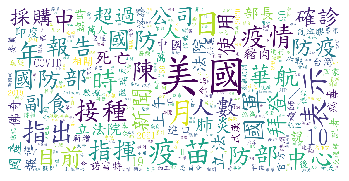

<Figure size 10000x10000 with 0 Axes>

In [91]:
wc = WordCloud(font_path="TW-Kai-98_1.ttf", #設置字體
               background_color="white", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               scale= 3,
               stopwords=stopwords)      #停用字詞
wc.generate_from_frequencies(hash)

plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(50, 50),dpi = 200)
plt.show()
wc.to_file("output.png")